In [1]:
import numpy as np
import tensorflow as tf
from scipy import signal as sg

In [2]:
x=[3,4,5]
h=[2,1,0]
y=np.convolve(x,h)
print y
y1 = np.convolve(x,h,mode='full')
y1

[ 6 11 14  5  0]


array([ 6, 11, 14,  5,  0])

In [3]:
x=[6,2] # change [6,2] to [2,4] and then [1,2,5,4] with using padding
h=[1,2,5,4]
y=np.convolve(x,h)
#[2,6]
# 0, 1,2,5,4 = 6*1 = 6
y

array([ 6, 14, 34, 34,  8])

In [5]:
x=[6,2] # invert filter x change [6,2] to [2,4] and then [1,2,5,4] withusing padding
h=[1,2,5,4]
y=np.convolve(x,h,mode='valid') #no padding
y1=np.convolve(x,h,mode='same')
print y #dimensional 4-2+1 = 3
print y1 #dimnsional same as input 4 

[14 34 34]
[ 6 14 34 34]


In [7]:
I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]
g= [[-1,1]]

print ('Without zero padding \n')
print ('{0} \n'.format(sg.convolve( I, g, 'valid')))
# The 'valid' argument states that the output consists only of those elements 
# that do not rely on the zero-padding.

print ('With zero padding \n')
print sg.convolve( I, g)

Without zero padding 

[[248   4]
 [-28 236]
 [  2 -14]] 

With zero padding 

[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]


In [9]:
#inver matrix
from numpy.linalg import inv
g= [[-1,  1],
    [ 2,  3],]

ig = inv(g)
ig

array([[-0.6,  0.2],
       [ 0.4,  0.2]])

In [14]:
input = tf.Variable(tf.random_normal([1,10,10,1]))
filter = tf.Variable(tf.random_normal([3,3,1,1]))

In [16]:
op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

In [20]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    print("Input \n")
    print('{0} \n'.format(input.eval()))
    print("Filter/Kernel \n")
    print('{0} \n'.format(filter.eval()))
    print("Result/Feature Map with valid positions \n")
    result = s.run(op)
    print(result)
    print('\n')
    print("Result/Feature Map with padding \n")
    result2 = s.run(op2)
    print(result2)
    print result.shape, result2.shape

Input 

[[[[ 0.58380723]
   [ 0.79575902]
   [ 0.88710791]
   [-0.02710031]
   [ 0.66693223]
   [ 2.00562501]
   [ 1.52400613]
   [ 0.38456541]
   [ 1.02731705]
   [ 0.03829912]]

  [[ 0.70011169]
   [ 0.20552845]
   [-0.58820873]
   [ 0.52250719]
   [ 1.45508254]
   [-0.9176597 ]
   [-0.21800438]
   [-2.45995307]
   [ 0.37090394]
   [ 1.20462084]]

  [[-0.15817708]
   [ 0.3483564 ]
   [-0.82650977]
   [-0.83010811]
   [ 1.61706436]
   [-0.40196311]
   [-1.005988  ]
   [ 0.60680062]
   [-0.73609799]
   [-0.12566841]]

  [[-1.37918377]
   [-2.51636744]
   [-0.22956054]
   [-0.6697005 ]
   [ 0.75121117]
   [-1.09530985]
   [-0.57173979]
   [ 0.27844068]
   [ 0.75460434]
   [-0.68108505]]

  [[ 0.14065573]
   [-0.49099395]
   [-1.45842266]
   [-0.31429374]
   [ 1.36254668]
   [-1.09610486]
   [-0.60559857]
   [-1.59659457]
   [-0.79541624]
   [-0.44377515]]

  [[ 1.22156465]
   [ 0.65778518]
   [ 0.03626815]
   [-1.07225657]
   [ 0.36972991]
   [-0.93382192]
   [-0.50988346]
   [ 0.471573

In [21]:
!wget --quiet https://ibm.box.com/shared/static/cn7yt7z10j8rx6um1v9seagpgmzzxnlz.jpg --output-document bird.jpg


In [23]:
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

In [25]:
raw= raw_input()

im = Image.open(raw)

bird.jpg


In [27]:
image_gr = im.convert("L")    
print("\n Original type: %r \n\n" % image_gr)


 Original type: <PIL.Image.Image image mode=L size=1920x1440 at 0x7F5E2D305F10> 




In [29]:
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
### Activating matplotlib for Ipython
%matplotlib inline

After conversion to numerical representation: 

 array([[ 64,  71,  64, ...,  49,  47,  48],
       [ 68,  71,  63, ...,  53,  52,  51],
       [ 65,  69,  65, ...,  54,  50,  55],
       ..., 
       [ 21,  23,  22, ..., 184, 170, 154],
       [ 17,  20,  26, ..., 179, 165, 152],
       [ 26,  22,  21, ..., 170, 159, 148]], dtype=uint8)



 Input image converted to gray scale: 



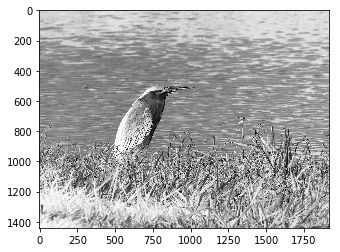

In [36]:
imgplot = plt.imshow(arr)
imgplot.set_cmap('Greys')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

In [37]:
kernel = np.array([
                        [ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0],
                                     ]) 
grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

GRADIENT MAGNITUDE - Feature map
AxesSubplot(0.125,0.125;0.775x0.755)


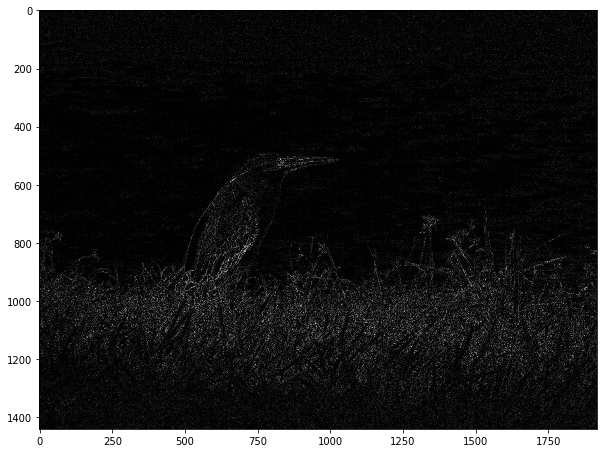

In [40]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
print aux
aux.imshow(np.absolute(grad), cmap='gray')

In [46]:
x = np.asarray([[1.07,2.18],[3.24,-4.3]])
print x
y = np.absolute(x)+10
print y
y[y>12.5]=12.5
print y

[[ 1.07  2.18]
 [ 3.24 -4.3 ]]
[[ 11.07  12.18]
 [ 13.24  14.3 ]]
[[ 11.07  12.18]
 [ 12.5   12.5 ]]
